<a href="https://colab.research.google.com/github/priya-2011/COVID-19-Detection-from-Chest-X-Ray/blob/main/B21EE067_B21EE062_B21EE015_COVID_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIBRARIES

In [ ]:
''' IMPORTING LIBRARIES THAT WILL BE USEFUL DURING THE IMPLEMENTATION '''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sklearn
import seaborn as sb
import scipy as sp
import PIL
from PIL import Image
import requests
from IPython.display import display
import torch
import os
import cv2
import torchvision
import torchvision.transforms as transforms
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_auc_score, silhouette_score
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.inspection import DecisionBoundaryDisplay
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# DATASET

In [ ]:
combined_dataset = []
Y_values = []

## Pneumonia chest scans

In [ ]:
%cd /content/drive/MyDrive/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/Viral Pneumonia/images

/content/drive/MyDrive/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/Viral Pneumonia/images


In [ ]:
''' STORING THE IMAGES OF CHEST SCANS FOR PNEUMONIA  '''

files = os.listdir('.')
image_files = []

for file in files:
    if file.endswith(('jpg', 'jpeg', 'png', 'bmp')):
        image_files.append(file)

image_list = []
for image_file in image_files:
    img = Image.open(image_file).convert('L')
    resized_img = img.resize((250, 250))
    img_array = np.array(resized_img)
    image_list.append(img_array)
    img = None
    img_array = None

pneumonia_imgs = image_list
combined_dataset.extend(pneumonia_imgs)

for i in range(len(pneumonia_imgs)):
    Y_values.append(0)
pneumonia_imgs = None
image_list = None

In [ ]:
%rm -rf /content/drive/MyDrive/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/Viral Pneumonia

## COVID datasets

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/COVID.metadata.xlsx')
urls = list(df['URL'])
uniq_urls = list(set(urls))

In [ ]:
!git clone https://github.com/ieee8023/covid-chestxray-dataset.git

fatal: destination path 'covid-chestxray-dataset' already exists and is not an empty directory.


In [ ]:
!git force clone https://github.com/armiro/COVID-CXNet

git: 'force' is not a git command. See 'git --help'.


In [ ]:
!wget https://sirm.org/category/senza-categoria/covid-19/

--2023-04-30 17:33:51--  https://sirm.org/category/senza-categoria/covid-19/
Resolving sirm.org (sirm.org)... 62.149.164.51
Connecting to sirm.org (sirm.org)|62.149.164.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘index.html.29’

index.html.29           [  <=>               ] 103.63K   363KB/s    in 0.3s    

2023-04-30 17:33:53 (363 KB/s) - ‘index.html.29’ saved [106118]



In [ ]:
!wget https://eurorad.org/

--2023-04-30 17:33:53--  https://eurorad.org/
Resolving eurorad.org (eurorad.org)... 34.76.99.26
Connecting to eurorad.org (eurorad.org)|34.76.99.26|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.eurorad.org/ [following]
--2023-04-30 17:33:54--  https://www.eurorad.org/
Resolving www.eurorad.org (www.eurorad.org)... 34.76.99.26
Connecting to www.eurorad.org (www.eurorad.org)|34.76.99.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘index.html.30’

index.html.30           [ <=>                ] 109.72K   689KB/s    in 0.2s    

2023-04-30 17:33:54 (689 KB/s) - ‘index.html.30’ saved [112356]



## Checking and combining all the dataset sources

In [ ]:
%cd /content/COVID-CXNet/chest_xray_images/covid19

[Errno 2] No such file or directory: '/content/COVID-CXNet/chest_xray_images/covid19'
/content/drive/MyDrive/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/Viral Pneumonia/images


In [ ]:
%cd /content/covid-chestxray-dataset/images

[Errno 2] No such file or directory: '/content/covid-chestxray-dataset/images'
/content/drive/MyDrive/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/Viral Pneumonia/images


In [ ]:
%cd /content/drive/MyDrive/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/COVID-19 Dataset/X-ray/COVID

/content/drive/MyDrive/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/COVID-19 Dataset/X-ray/COVID


In [ ]:
files = os.listdir('.')
image_files = [file for file in files if file.endswith(('jpg', 'jpeg', 'png', 'bmp'))]

image_list = []
for image_file in image_files:
    if len(image_list)<1000:
        img = Image.open(image_file).convert('L')
        resized_img = img.resize((250, 250))
        img_array = np.array(resized_img)
        image_list.append(img_array)
        img = None
        resized_img = None
        img_array = None
    else:
        break

radiology_array = image_list
combined_dataset.extend(radiology_array)
for i in range(len(radiology_array)):
    Y_values.append(1)
image_list = None

In [ ]:
%rm -rf /content/drive/MyDrive/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/COVID-19 Dataset/X-ray/COVID

In [ ]:
%cd /content/drive/MyDrive/SIRM Xrays

/content/drive/MyDrive/SIRM Xrays


In [ ]:
files = os.listdir('.')
image_files = [file for file in files if file.endswith(('jpg', 'jpeg', 'png', 'bmp'))]

image_list = []
for image_file in image_files:
    if len(image_list)<1000:
        img = Image.open(image_file).convert('L')
        resized_img = img.resize((250, 250))
        img_array = np.array(resized_img)
        image_list.append(img_array)
        img = None
        resized_img = None
        img_array = None
    else:
        break

sirm_array = image_list
combined_dataset.extend(sirm_array)
for i in range(len(sirm_array)):
    Y_values.append(1)
image_list = None

In [ ]:
%rm -rf /content/drive/MyDrive/SIRM Xrays

# DATA PREPROCESSING

## Converting to DataFrame

In [ ]:
dset = np.array(combined_dataset)
dset = dset.reshape((2412,62500))

df = pd.DataFrame(dset)
df['COVID-Class'] = Y_values
df = df.sample(frac=1)
df

,0,1,2,3,4,5,6,7,8,9,...,62491,62492,62493,62494,62495,62496,62497,62498,62499,COVID-Class
261,88,108,104,95,90,93,81,65,62,64,...,0,0,0,0,0,0,0,0,0,0
1609,0,0,0,0,1,0,0,0,0,1,...,203,201,200,197,196,196,196,194,193,1
2283,0,0,0,0,0,0,0,0,0,0,...,163,162,161,160,151,148,149,150,146,1
2154,0,0,0,0,0,0,0,0,0,0,...,196,194,189,187,185,181,175,176,173,1
975,13,13,13,13,13,12,12,12,12,11,...,13,13,13,13,13,13,14,14,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,59,60,60,59,59,59,58,54,62,91,...,142,149,147,115,101,95,86,78,70,0
1891,60,58,58,59,59,57,59,56,56,59,...,52,28,24,24,25,24,20,24,38,1
2383,22,21,21,21,20,20,19,21,23,23,...,22,22,22,22,21,19,19,20,16,1
980,0,2,6,8,8,10,12,10,16,118,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1 = df.copy()

In [ ]:
# FEATURE DATA

X = df.iloc[:,:-1]
X

,0,1,2,3,4,5,6,7,8,9,...,62490,62491,62492,62493,62494,62495,62496,62497,62498,62499
261,88,108,104,95,90,93,81,65,62,64,...,0,0,0,0,0,0,0,0,0,0
1609,0,0,0,0,1,0,0,0,0,1,...,204,203,201,200,197,196,196,196,194,193
2283,0,0,0,0,0,0,0,0,0,0,...,158,163,162,161,160,151,148,149,150,146
2154,0,0,0,0,0,0,0,0,0,0,...,199,196,194,189,187,185,181,175,176,173
975,13,13,13,13,13,12,12,12,12,11,...,13,13,13,13,13,13,13,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,59,60,60,59,59,59,58,54,62,91,...,152,142,149,147,115,101,95,86,78,70
1891,60,58,58,59,59,57,59,56,56,59,...,66,52,28,24,24,25,24,20,24,38
2383,22,21,21,21,20,20,19,21,23,23,...,24,22,22,22,22,21,19,19,20,16
980,0,2,6,8,8,10,12,10,16,118,...,0,0,0,0,0,0,0,0,0,0


## PCA reduction

In [ ]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

pca = PCA(n_components=20)
pca_X = pca.fit_transform(X)
pca_X = pd.DataFrame(pca_X)
pca_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-7916.399869,-3025.127698,-471.789269,-1715.866815,1047.594307,-734.886265,-501.006190,2131.699999,-130.863762,-1717.513669,-269.660859,826.729361,337.431110,824.297378,-731.918146,518.904914,-430.360518,388.898507,-60.225560,-636.084214
1,9161.217981,2003.390223,857.589015,-3220.064554,-296.492597,-2232.103550,-2613.453824,-495.363608,-1889.914784,968.385316,662.412650,-1117.770527,182.747426,1862.177935,-143.046233,720.431531,207.104014,1145.557353,-222.957391,388.491217
2,6501.828219,8982.523570,-363.979773,-4311.159839,1253.914616,-95.355995,-164.071955,168.402069,361.212748,2020.120535,-1252.404724,-1221.668433,871.470013,1336.314642,157.783545,658.677243,1497.186215,175.699698,-369.904784,-309.199451
3,6576.360614,6718.634180,-145.491606,-5263.825996,182.744237,-981.059353,-2200.172412,421.513258,1109.085579,252.306142,1116.435632,666.785936,291.829640,1463.377715,207.594012,-276.532898,-1096.541391,-1328.401485,-915.966907,-667.587085
4,-4888.415257,435.645345,-4598.553069,1467.268789,-1662.510049,-608.423804,-1956.145430,-1267.996223,-95.139392,-1392.387148,-409.857470,1439.265424,-714.540815,164.651505,-1154.180854,781.380941,-591.949754,1074.056022,-1204.001217,-145.557299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2407,2965.019157,2498.104572,862.807303,-220.509712,-1026.895000,-1407.619492,382.883986,1460.498574,-1128.649787,-1781.866156,2065.109889,2327.140785,-1426.015912,2421.536323,503.481407,-134.723249,487.640254,527.329227,443.886121,754.594269
2408,15033.820166,-6752.285190,-3453.057276,2165.884787,2685.188405,2259.366026,-722.884118,944.715656,4562.973753,1012.226717,1208.705382,1042.614790,-2483.597073,-536.127986,-2501.165344,-163.980829,837.871303,265.364088,1399.633408,515.512463
2409,-1355.448247,1306.320518,-582.058872,-697.424285,373.665928,2589.392140,-5369.134160,-2378.946357,1430.636694,-890.439324,588.126035,-128.664139,429.602299,-1561.752900,219.881904,199.394938,463.748353,547.721544,-1275.299819,-562.669690
2410,-5304.695848,-5291.444227,116.884232,-96.983326,2501.420951,1746.890035,1598.407603,831.774882,826.673115,1067.919877,-229.928574,618.930790,2007.401723,653.319125,-135.779314,-801.767774,-773.211180,189.409850,-101.541814,-51.172340


In [ ]:
pca_X_train,pca_X_test,pca_Y_train,pca_Y_test = train_test_split(pca_X,Y, train_size = 0.7)

## ICA reduction

In [ ]:
ica = FastICA(n_components=2)
ica_X = ica.fit_transform(X)
ica_X = pd.DataFrame(ica_X)
ica_X

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


,0,1
0,-0.026087,-0.007365
1,0.026460,0.012829
2,0.037607,-0.012640
3,0.032144,-0.005977
4,-0.010372,-0.011173
...,...,...
2407,0.013170,-0.001168
2408,0.018420,0.049929
2409,0.000076,-0.006508
2410,-0.025610,0.004453


In [ ]:
ica_X_train,ica_X_test,ica_Y_train,ica_Y_test = train_test_split(ica_X,Y, train_size = 0.7)

# DATA VISUALISATION

## Data Distribution

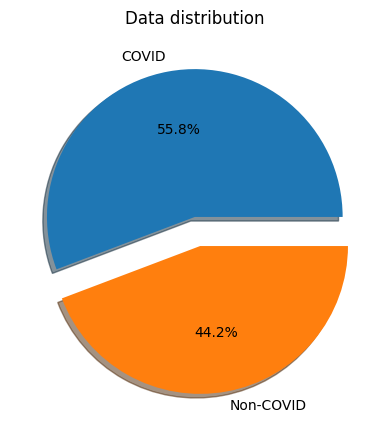

In [ ]:
L = list(df['COVID-Class'])
c0 = L.count(0)
c1 = L.count(1)
explode = [0,0.2]
plt.pie([c0,c1],labels = ["COVID","Non-COVID"],explode = explode,shadow=True,autopct='%1.1f%%')
plt.title("Data distribution")
plt.show()

<Axes: >

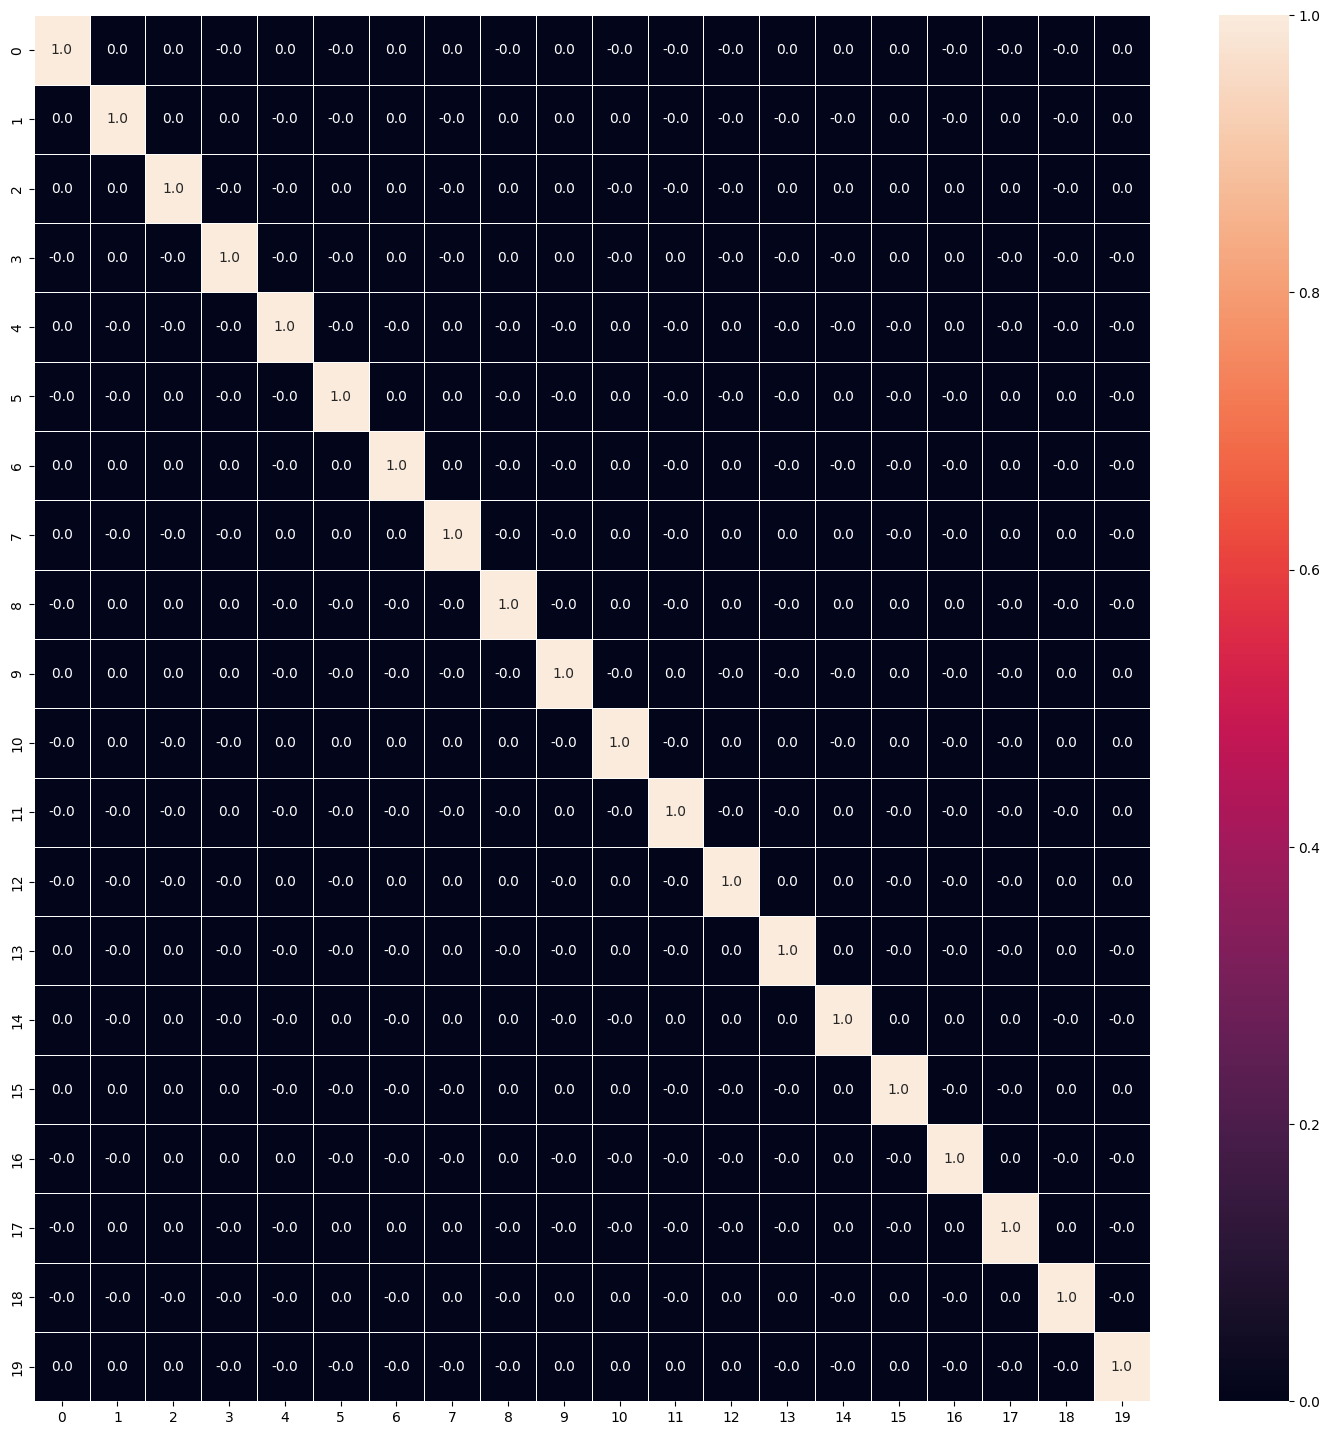

In [ ]:
# AFTER PCA

fi,ax=plt.subplots(figsize=(18,18))
sb.heatmap(pca_X.corr(),annot=True, linewidths=.5, fmt='.1f',ax=ax)

<Axes: >

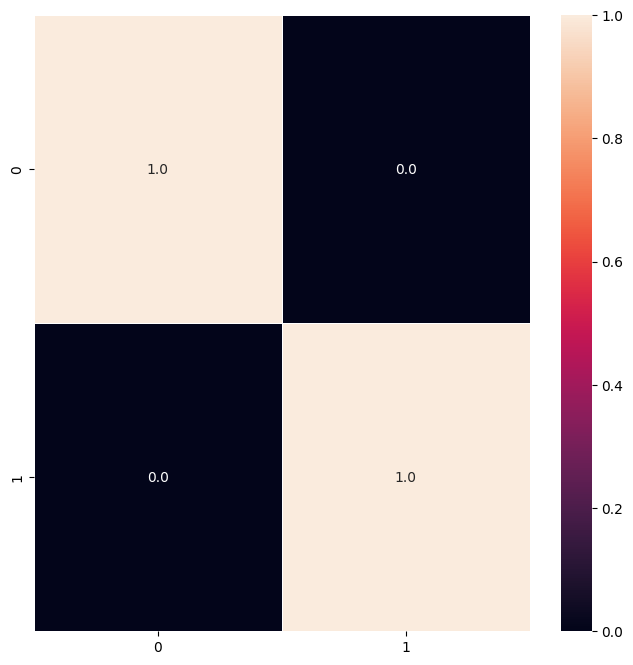

In [ ]:
# AFTER ICA

fi,ax=plt.subplots(figsize=(8,8))
sb.heatmap(ica_X.corr(),annot=True, linewidths=.5, fmt='.1f',ax=ax)

## COVID Data Images

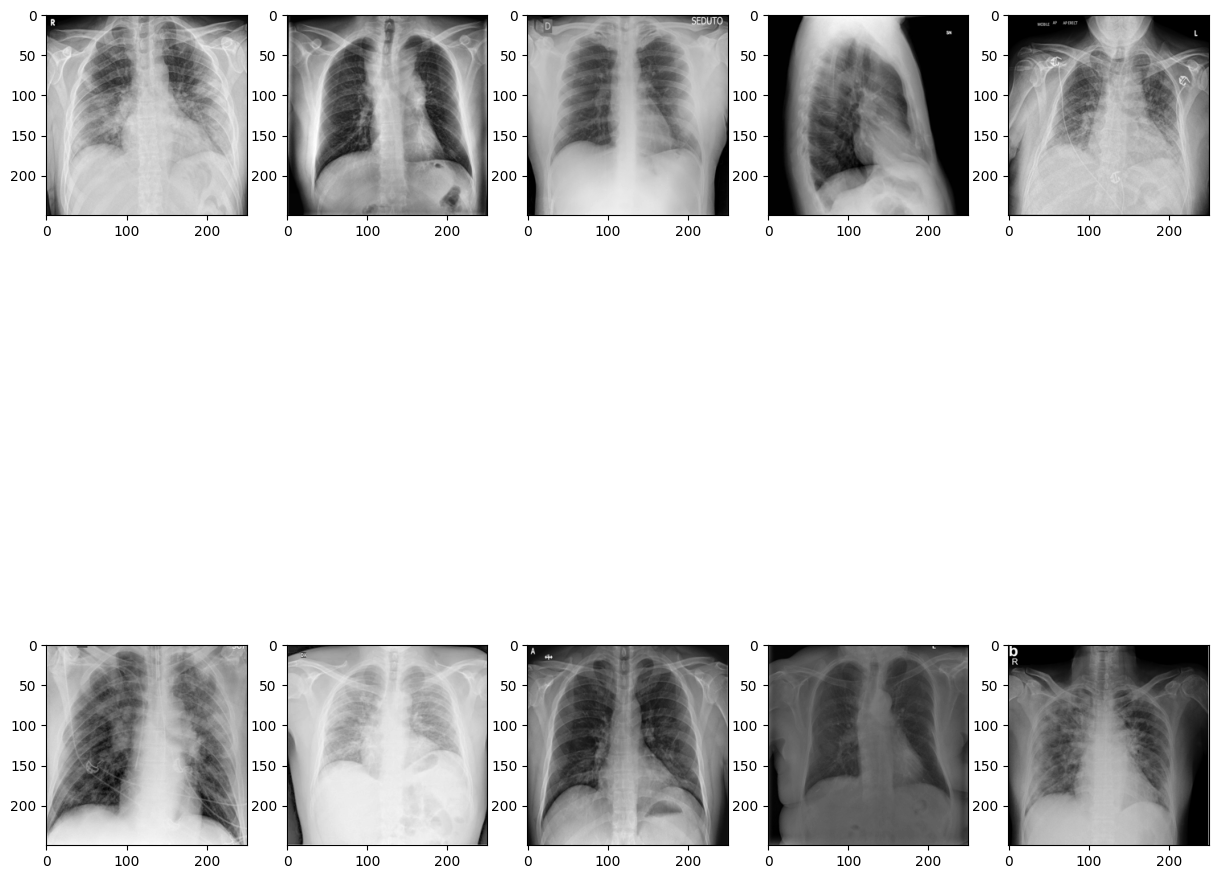

In [ ]:
cov_data = df[df["COVID-Class"]==1]
fig,axs = plt.subplots(2,5, figsize=(15,15))

x = 0
y = 0

for i in range(10):
    a = np.random.randint(0,len(cov_data))
    img_data = np.array(cov_data.iloc[a,:-1])
    img = img_data.reshape(250,250)
    axs[x,y].imshow(img, cmap='gray')

    if (x==0 and y<4):
        y+=1
    elif (x==1 and y<4):
        y+=1
    else:
        x+=1
        y=0

plt.show()

## Non-COVID Data Images

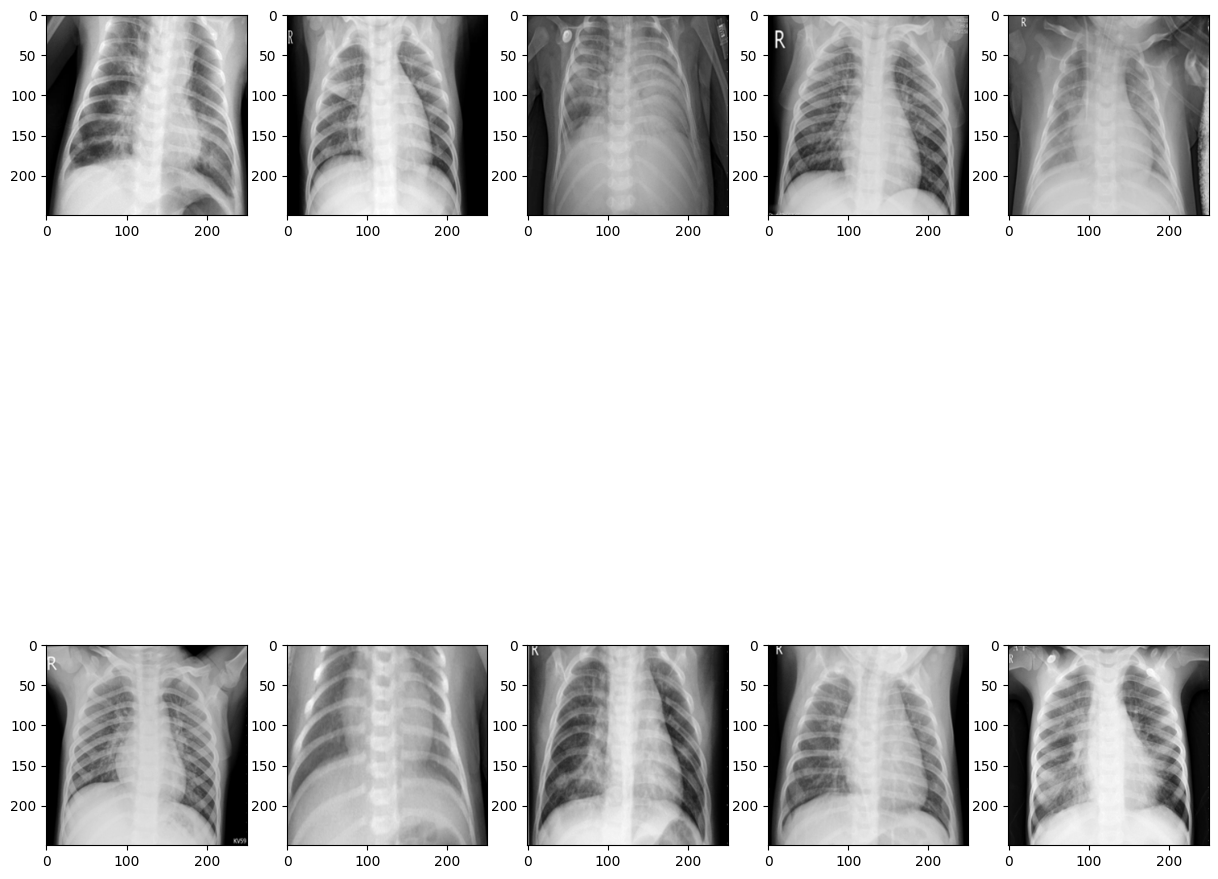

In [ ]:
non_cov_data = df[df["COVID-Class"]==0]
fig,axs = plt.subplots(2,5, figsize=(15,15))

x = 0
y = 0

for i in range(10):
    a = np.random.randint(0,len(non_cov_data))
    img_data = np.array(non_cov_data.iloc[a,:-1])
    img = img_data.reshape(250,250)
    axs[x,y].imshow(img, cmap='gray')

    if (x==0 and y<4):
        y+=1
    elif (x==1 and y<4):
        y+=1
    else:
        x+=1
        y=0

plt.show()

# UNSUPERVISED LEARNING

In [ ]:
learning_models = []
pca_accuracies = []
ica_accuracies = []

## K Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy score for K-Means model = 0.8453565505804311 

Silhouette score = 0.25764670845058074


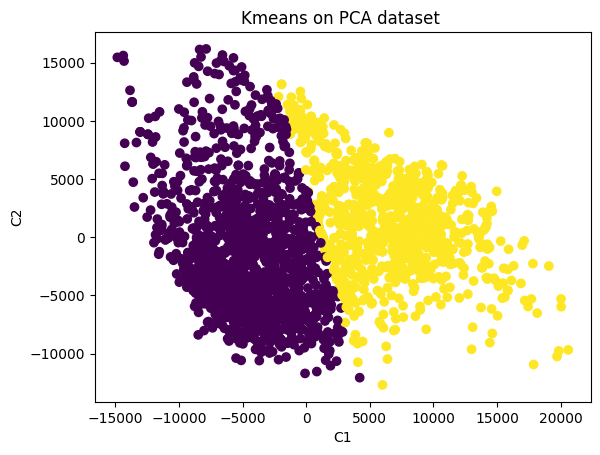

In [ ]:
# FOR PCA

kmeans = KMeans(n_clusters = 2)
kmeans.fit_predict(pca_X)
L = kmeans.labels_
s_score_pca = silhouette_score(pca_X,L)

print("Accuracy score for K-Means model =",accuracy_score(L, list(df['COVID-Class'])), "\n")
print("Silhouette score =",silhouette_score(pca_X,L))

plt.scatter(list(pca_X.iloc[:,0]),list(pca_X.iloc[:,1]), c=L)
plt.xlabel("C1")
plt.ylabel("C2")
plt.title("Kmeans on PCA dataset ")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy score for K-Means model = 0.9050580431177446 

Silhouette score = 0.3999591068107319


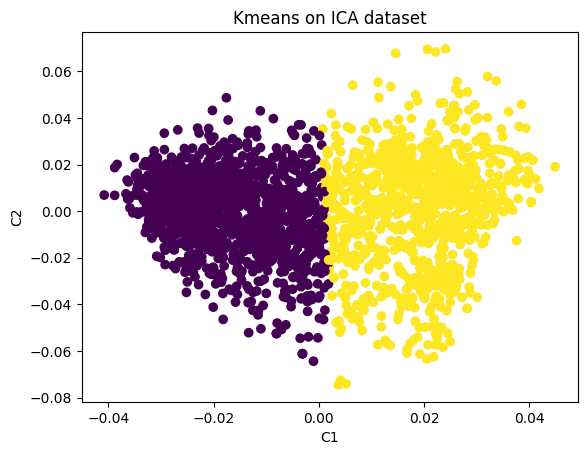

In [ ]:
# FOR ICA

kmeans = KMeans(n_clusters = 2)
kmeans.fit_predict(ica_X)
L = kmeans.labels_
s_score_ica = silhouette_score(ica_X,L)

print("Accuracy score for K-Means model =",accuracy_score(L, list(df['COVID-Class'])), "\n")
print("Silhouette score =",silhouette_score(ica_X,L))



plt.scatter(list(ica_X.iloc[:,0]),list(ica_X.iloc[:,1]), c=L)
plt.xlabel("C1")
plt.ylabel("C2")
plt.title("Kmeans on ICA dataset")
plt.show()

In [ ]:
learning_models.append('KMeans')
pca_accuracies.append(s_score_pca)
ica_accuracies.append(s_score_ica)

# SUPERVISED LEARNING

## Gaussian Naive Bayes

<Axes: >

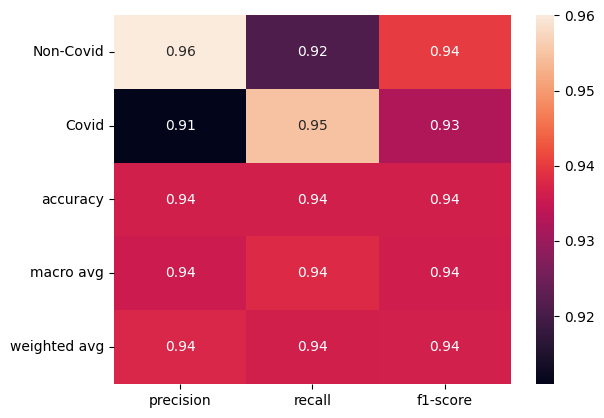

In [ ]:
# FOR PCA

gnb = GaussianNB()

gnb.fit(pca_X_train,pca_Y_train)

y_pred_gnb = gnb.predict(pca_X_test)

report = classification_report(pca_Y_test,y_pred_gnb,labels=[0,1],target_names=["Non-Covid","Covid"],output_dict=True)

sb.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

In [ ]:
learning_models.append('GNB')
pca_accuracies.append(accuracy_score(pca_Y_test,y_pred_gnb))

<Axes: >

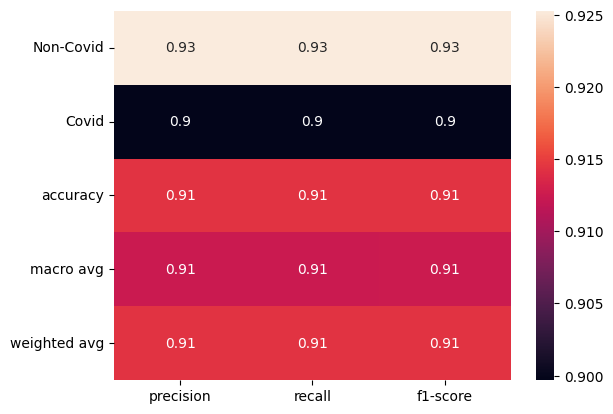

In [ ]:
# FOR ICA

gnb = GaussianNB()

gnb.fit(ica_X_train,ica_Y_train)

y_pred_gnb = gnb.predict(ica_X_test)

report = classification_report(ica_Y_test,y_pred_gnb,labels=[0,1],target_names=["Non-Covid","Covid"],output_dict=True)
ica_accuracies.append(accuracy_score(ica_Y_test,y_pred_gnb))

sb.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)


## Decision Tree Classifier (DTC)

Accuracy score = 0.9295580110497238 



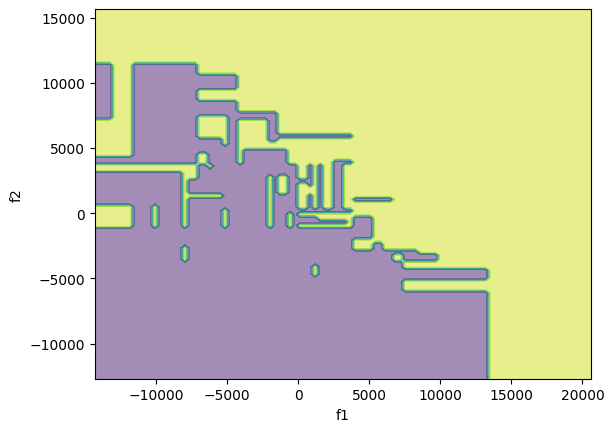

In [ ]:
# PCA

dtc = DTC()
dtc.fit(pca_X_train,pca_Y_train)
y_pred = dtc.predict(pca_X_test)
print("Accuracy score =",accuracy_score(y_pred,pca_Y_test),"\n")

dtc = DTC()
dtc.fit(pca_X_train.iloc[:,:2],pca_Y_train)
DecisionBoundaryDisplay.from_estimator(dtc,pca_X_train.iloc[:,:2],response_method="predict",xlabel='f1',ylabel='f2',alpha = 0.5)


In [ ]:
learning_models.append('DTC')
pca_accuracies.append(accuracy_score(y_pred,pca_Y_test))

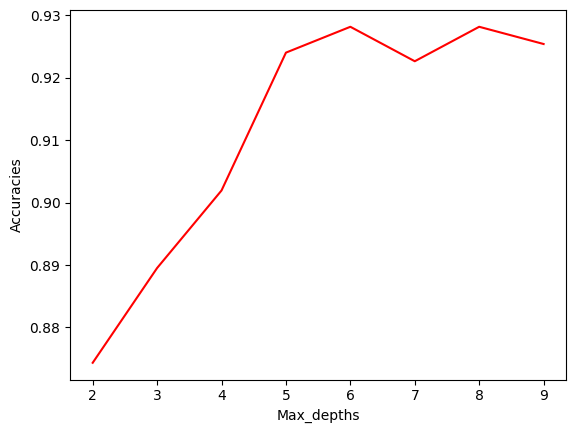

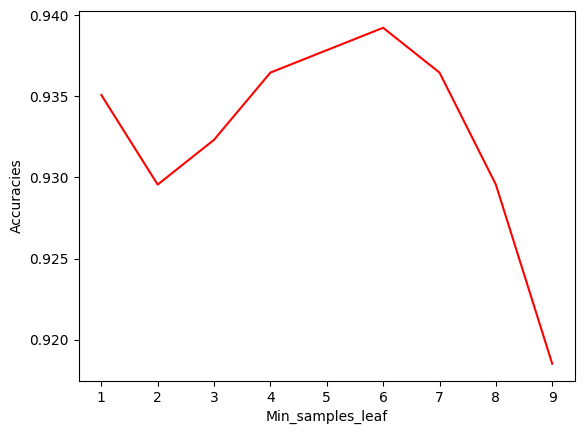

In [ ]:
# VARYING HYPERPARAMETERS

# Max_depth
acc = []
depths = []
for d in range(2,10):
    dtc = DTC(max_depth = d)
    dtc.fit(pca_X_train,pca_Y_train)
    y_pred = dtc.predict(pca_X_test)
    depths.append(d)
    acc.append(accuracy_score(y_pred,pca_Y_test))
plt.plot(depths,acc,c="r")
plt.xlabel("Max_depths")
plt.ylabel("Accuracies")
plt.show()

# min_samples_leaf
acc = []
leaves = []
for l in range(1,10):
    dtc = DTC(min_samples_leaf = l)
    dtc.fit(pca_X_train,pca_Y_train)
    y_pred = dtc.predict(pca_X_test)
    leaves.append(l)
    acc.append(accuracy_score(y_pred,pca_Y_test))
plt.plot(leaves,acc,c="r")
plt.xlabel("Min_samples_leaf")
plt.ylabel("Accuracies")
plt.show()

Accuracy score = 0.9046961325966851 



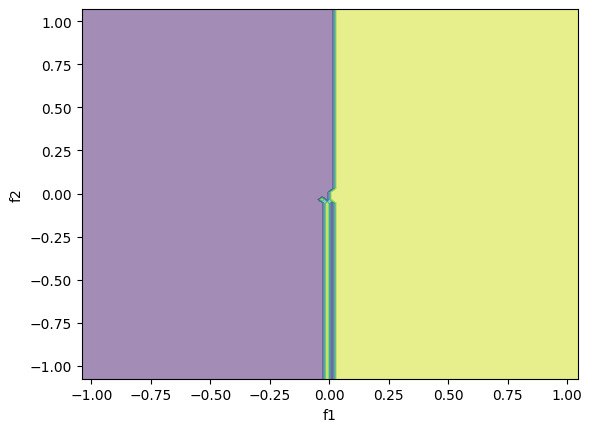

In [ ]:
# ICA

dtc = DTC()
dtc.fit(ica_X_train,ica_Y_train)
y_pred = dtc.predict(ica_X_test)
print("Accuracy score =",accuracy_score(y_pred,ica_Y_test),"\n")

dtc = DTC()
dtc.fit(ica_X_train.iloc[:,:2],ica_Y_train)
DecisionBoundaryDisplay.from_estimator(dtc,ica_X_train.iloc[:,:2],response_method="predict",xlabel='f1',ylabel='f2',alpha = 0.5)

In [ ]:
ica_accuracies.append(accuracy_score(y_pred,ica_Y_test))

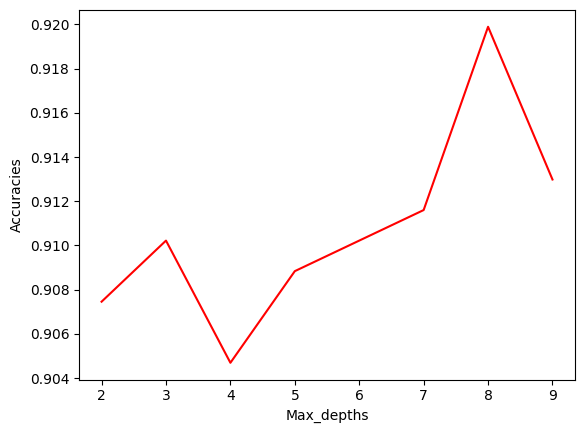

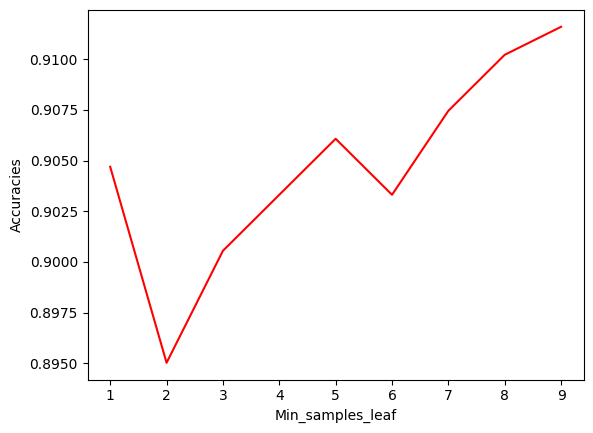

In [ ]:
# VARYING HYPERPARAMETERS

# Max_depth
acc = []
depths = []
for d in range(2,10):
    dtc = DTC(max_depth = d)
    dtc.fit(ica_X_train,ica_Y_train)
    y_pred = dtc.predict(ica_X_test)
    depths.append(d)
    acc.append(accuracy_score(y_pred,ica_Y_test))
plt.plot(depths,acc,c="r")
plt.xlabel("Max_depths")
plt.ylabel("Accuracies")
plt.show()

# min_samples_leaf
acc = []
leaves = []
for l in range(1,10):
    dtc = DTC(min_samples_leaf = l)
    dtc.fit(ica_X_train,ica_Y_train)
    y_pred = dtc.predict(ica_X_test)
    leaves.append(l)
    acc.append(accuracy_score(y_pred,ica_Y_test))
plt.plot(leaves,acc,c="r")
plt.xlabel("Min_samples_leaf")
plt.ylabel("Accuracies")
plt.show()

## Random Forest Classifier (RFC)

Accuracy score = 0.9834254143646409 



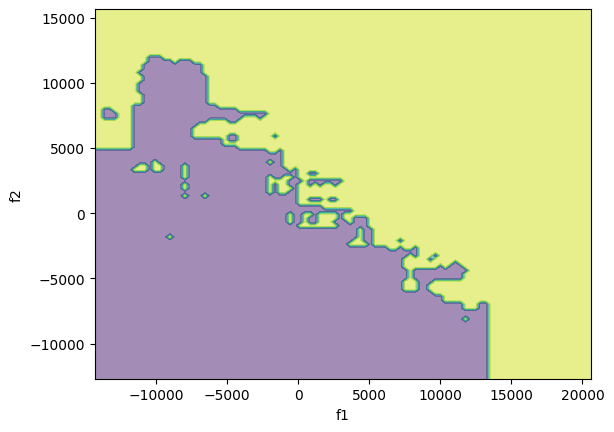

In [ ]:
# PCA

rfc = RFC()
rfc.fit(pca_X_train,pca_Y_train)
y_pred = rfc.predict(pca_X_test)
print("Accuracy score =",accuracy_score(y_pred,pca_Y_test),"\n")

rfc1 = RFC()
rfc1.fit(pca_X_train.iloc[:,:2],pca_Y_train)
DecisionBoundaryDisplay.from_estimator(rfc1,pca_X_train.iloc[:,:2],response_method="predict",xlabel='f1',ylabel='f2',alpha = 0.5)


In [ ]:
learning_models.append('RFC')
pca_accuracies.append(accuracy_score(y_pred,pca_Y_test))

Accuracy score = 0.9240331491712708 



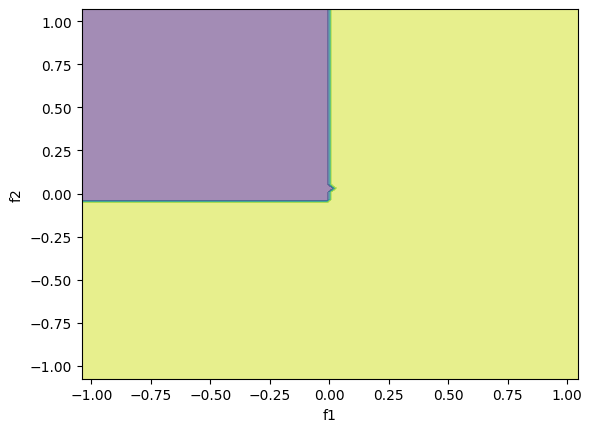

In [ ]:
# ICA

rfc = RFC()
rfc.fit(ica_X_train,ica_Y_train)
y_pred = rfc.predict(ica_X_test)
print("Accuracy score =",accuracy_score(y_pred,ica_Y_test),"\n")

rfc2 = RFC()
rfc2.fit(ica_X_train.iloc[:,:2],ica_Y_train)
DecisionBoundaryDisplay.from_estimator(rfc2,ica_X_train.iloc[:,:2],response_method="predict",xlabel='f1',ylabel='f2',alpha = 0.5)

In [ ]:
ica_accuracies.append(accuracy_score(y_pred,ica_Y_test))

## XGBoost

In [ ]:
# PCA

xgb = XGBClassifier()
xgb.fit(pca_X_train,pca_Y_train)
y_pred_xgb = xgb.predict(pca_X_test)
print("Accuracy score =",accuracy_score(y_pred_xgb,pca_Y_test))
print("Area Under Curve :" + str(roc_auc_score(y_pred_xgb,pca_Y_test)),"\n")

print(classification_report(y_pred_xgb,pca_Y_test))

Accuracy score = 0.9765193370165746
Area Under Curve :0.9775985732263768 

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       401
           1       0.96      0.99      0.97       323

    accuracy                           0.98       724
   macro avg       0.98      0.98      0.98       724
weighted avg       0.98      0.98      0.98       724



In [ ]:
learning_models.append('XGB')
pca_accuracies.append(accuracy_score(y_pred_xgb,pca_Y_test))

In [ ]:
# LDA

xgb = XGBClassifier()
xgb.fit(ica_X_train,ica_Y_train)
y_pred_xgb = xgb.predict(ica_X_test)
print("Accuracy score =",accuracy_score(y_pred_xgb,ica_Y_test))
print("Area Under Curve :" + str(roc_auc_score(y_pred_xgb,ica_Y_test)),"\n")

print(classification_report(y_pred_xgb,ica_Y_test))

Accuracy score = 0.919889502762431
Area Under Curve :0.9198662207357859 

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       425
           1       0.89      0.92      0.90       299

    accuracy                           0.92       724
   macro avg       0.92      0.92      0.92       724
weighted avg       0.92      0.92      0.92       724



In [ ]:
ica_accuracies.append(accuracy_score(y_pred_xgb,ica_Y_test))

## Support Vector Machine (SVM)

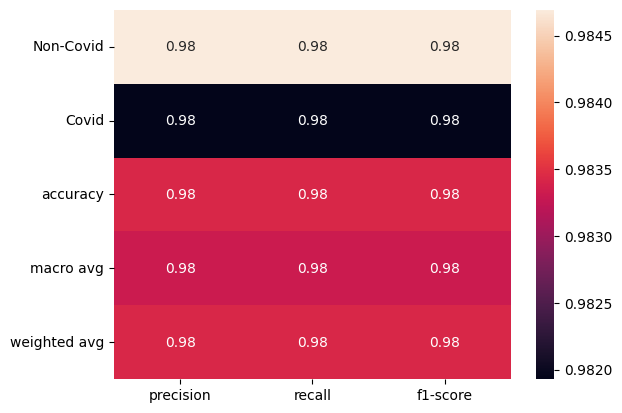

In [ ]:
# PCA

svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(pca_X_train, pca_Y_train)
y_pred_svm = svm.predict(pca_X_test)
report = classification_report(pca_Y_test,y_pred_svm,labels=[0,1],target_names=["Non-Covid","Covid"],output_dict=True)
sb.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

# Varying the kernel

accuracies = []

# 1. Linear

svm = make_pipeline(StandardScaler(), SVC(kernel="linear"))
svm.fit(pca_X_train, pca_Y_train)
y_pred_linear = svm.predict(pca_X_test)
acc1 = accuracy_score(y_pred_linear,pca_Y_test)
accuracies.append(acc1)

# 2. Sigmoid

svm = make_pipeline(StandardScaler(), SVC(kernel="sigmoid"))
svm.fit(pca_X_train, pca_Y_train)
y_pred_sigmoid = svm.predict(pca_X_test)
acc2 = accuracy_score(y_pred_sigmoid,pca_Y_test)
accuracies.append(acc2)

# 3. Polynomial

svm = make_pipeline(StandardScaler(), SVC(kernel="poly"))
svm.fit(pca_X_train, pca_Y_train)
y_pred_poly = svm.predict(pca_X_test)
acc3 = accuracy_score(y_pred_poly,pca_Y_test)
accuracies.append(acc3)

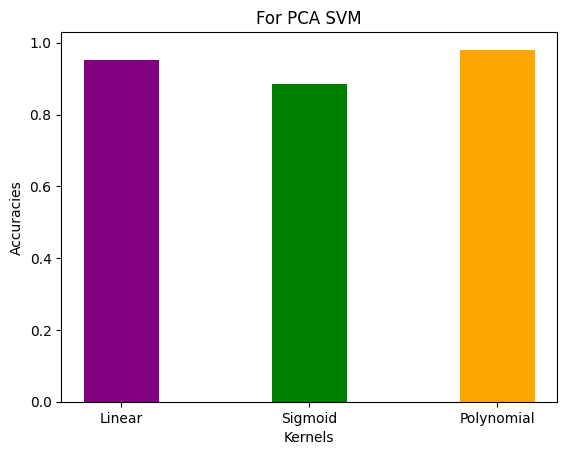

In [ ]:
models = ["Linear","Sigmoid","Polynomial"]
plt.bar(models,accuracies,width=0.4,color=["Purple","Green","Orange"])
plt.xlabel("Kernels")
plt.ylabel("Accuracies")
plt.title("For PCA SVM")
plt.show()

In [ ]:
learning_models.extend(['LinearSVM','SigmoidSVM','PolySVM'])
pca_accuracies.extend(accuracies)

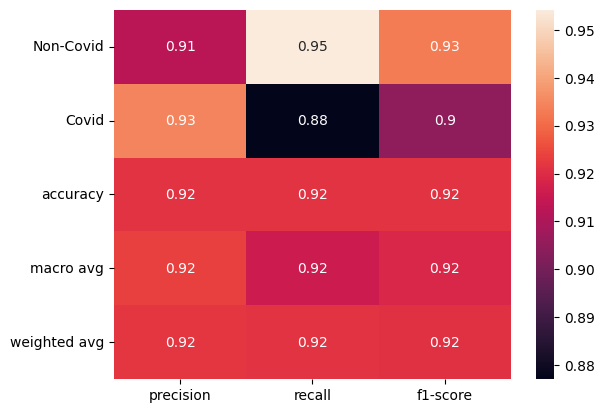

In [ ]:
# ICA


svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(ica_X_train,ica_Y_train)
y_pred_svm = svm.predict(ica_X_test)
report = classification_report(ica_Y_test,y_pred_svm,labels=[0,1],target_names=["Non-Covid","Covid"],output_dict=True)
sb.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

# Varying the kernel

accuracies = []

# 1. Linear

svm = make_pipeline(StandardScaler(), SVC(kernel="linear"))
svm.fit(ica_X_train, ica_Y_train)
y_pred_linear = svm.predict(ica_X_test)
acc1 = accuracy_score(y_pred_linear,ica_Y_test)
accuracies.append(acc1)

# 2. Sigmoid

svm = make_pipeline(StandardScaler(), SVC(kernel="sigmoid"))
svm.fit(ica_X_train, ica_Y_train)
y_pred_sigmoid = svm.predict(ica_X_test)
acc2 = accuracy_score(y_pred_sigmoid,ica_Y_test)
accuracies.append(acc2)

# 3. Polynomial

svm = make_pipeline(StandardScaler(), SVC(kernel="poly"))
svm.fit(ica_X_train, ica_Y_train)
y_pred_poly = svm.predict(ica_X_test)
acc3 = accuracy_score(y_pred_poly,ica_Y_test)
accuracies.append(acc3)

In [ ]:
ica_accuracies.extend(accuracies)

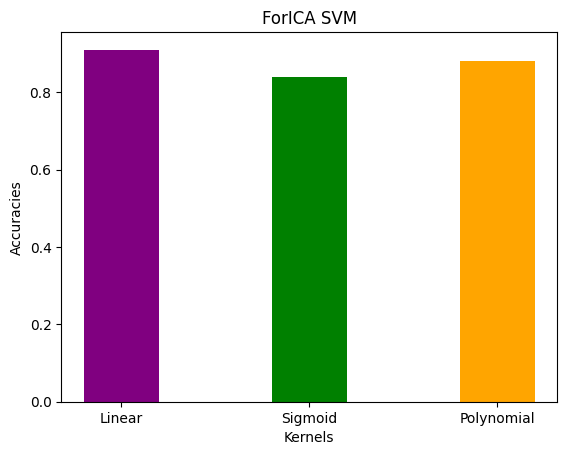

In [ ]:
models = ["Linear","Sigmoid","Polynomial"]
plt.bar(models,accuracies,width=0.4,color=["Purple","Green","Orange"])
plt.xlabel("Kernels")
plt.ylabel("Accuracies")
plt.title("ForICA SVM")
plt.show()

# COMPARATIVE STUDY OF MODELS

In [ ]:
# Accuracy for KMeans = 0.844 (PCA) and 0.905 (LDA)
# What we have earlier considered was the silhouette score.

pca_accuracies[0] = 0.844
ica_accuracies[0] = 0.905

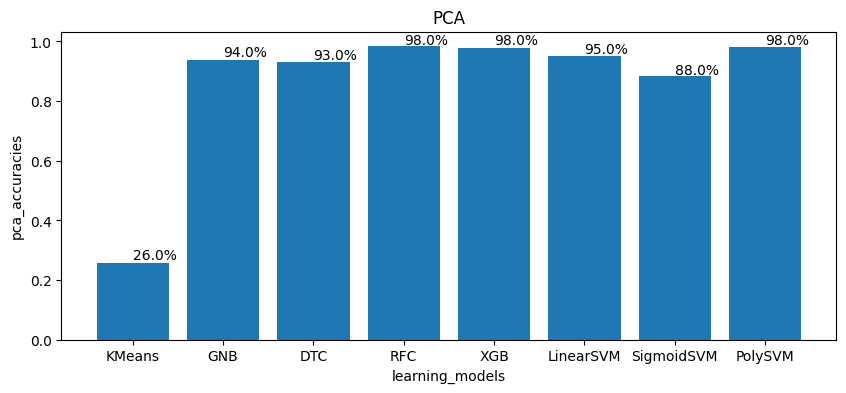

In [ ]:
plt.figure(figsize=(10, 4))
plt.bar(learning_models,pca_accuracies)
plt.title("PCA")
plt.ylabel('pca_accuracies')
plt.xlabel('learning_models')
values=[round(acc, 2) for acc in pca_accuracies]

for i, v in enumerate(values):
    plt.text(i, v +0.011, (str(v*100)+'%'))

plt.show()

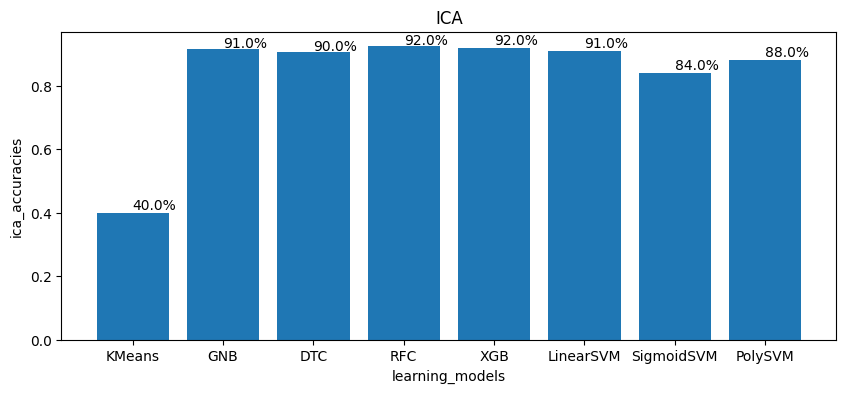

In [ ]:
plt.figure(figsize=(10, 4))
plt.bar(learning_models,ica_accuracies)
plt.title("ICA")
plt.ylabel('ica_accuracies')
plt.xlabel('learning_models')

values=[round(acc, 2) for acc in ica_accuracies]

for i, v in enumerate(values):
    plt.text(i, v +0.011, (str(v*100)+'%'))

plt.show()

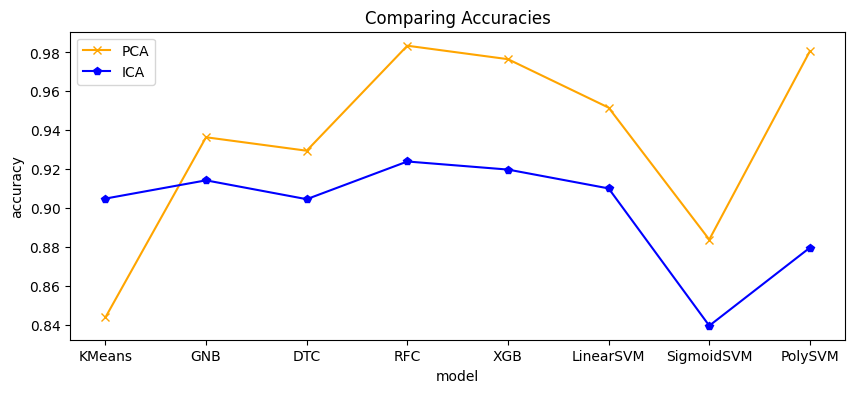

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(learning_models,pca_accuracies,marker='x',color='orange')
plt.plot(learning_models,ica_accuracies,marker='p',color='blue')
plt.xlabel('model')
plt.ylabel('accuracy')
plt.title('Comparing Accuracies')
plt.legend(['PCA','ICA'],loc='best')